# Financial Applications of Machine Learning - Assignment 3

For this assignment use data at: “https://www.kaggle.com/wendykan/lending-club-loan-data/download”

In [33]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

1.	Read the data and do the preprocessing similar to the GBM file submitted to eLearning. Try not to exclude any variable as much as possible.

In [2]:
data=pd.read_csv("loan.csv", low_memory=False)

In [3]:
# Exploring the data
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [4]:
print(data.shape)

(2260668, 145)


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [6]:
pd.DataFrame(data.isna().sum(),columns=['Count of NaN']).sort_values(by=['Count of NaN'],ascending=False)

,Count of NaN
id,2260668
url,2260668
member_id,2260668
orig_projected_additional_accrued_interest,2252242
hardship_length,2250055
hardship_reason,2250055
hardship_status,2250055
deferral_term,2250055
hardship_amount,2250055
hardship_start_date,2250055


In [7]:
#drop all rows with missing values in target column acc_now_delinq
data.dropna(subset=['acc_now_delinq'], inplace=True)

In [8]:
#drop columns with too many NaN values
data.dropna(axis='columns', thresh=data.shape[0]*0.99, inplace=True)

In [9]:
#transform target acc_now_delinq such that all non-zero values are 1
data['acc_now_delinq'] = data['acc_now_delinq'].map(lambda x: 1 if x > 0 else 0)

In [10]:
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Feb-2019,0.0,1,Individual,0,0.0,0.0,1.0,0.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Feb-2019,0.0,1,Individual,0,0.0,0.0,1.0,0.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Feb-2019,0.0,1,Individual,0,0.0,0.0,0.0,0.0,N,Cash,N


In [11]:
data.shape

(2260639, 50)

In [13]:
#convert string to int while retaining missing values
for col in data.columns:
    if any(isinstance(x, str) for x in data[col].dropna()):
        encoding = np.unique(data[col].dropna()).tolist()
        data[col] = data[col].map(lambda x: encoding.index(x) if isinstance(x, str) else x)

In [14]:
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,0,13.56,84.92,2,10,5,55000.0,0,34,1,0,2,101.0,34,18.24,0.0,46,1.0,9.0,1.0,4341,10.3,34.0,1,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,45.0,84.92,45.0,0.0,1,0,0,0.0,0.0,1.0,0.0,0,0,0
1,30000,30000,30000.0,1,18.94,777.23,3,16,1,90000.0,1,34,1,0,2,682.0,18,26.52,0.0,414,0.0,13.0,1.0,12315,24.2,44.0,1,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,45.0,777.23,45.0,0.0,1,0,0,0.0,0.0,1.0,0.0,0,0,0
2,5000,5000,5000.0,0,17.97,180.69,3,15,1,59280.0,1,34,1,0,2,477.0,22,10.51,0.0,56,0.0,8.0,0.0,4599,19.1,13.0,1,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,45.0,180.69,45.0,0.0,1,0,0,0.0,0.0,0.0,0.0,0,0,0


2.	Split the sample to test and train.

In [15]:
from sklearn.model_selection import train_test_split

target = 'acc_now_delinq'
X = data.drop(target, axis=1, inplace=False)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123)

3.	Use sklearn to build a GBM model to predict whether a customer has any delinquent account. Do Grid search on as many parameters as you find useful. Include “Number of Trees”, and “Learning Rate” for sure. Use the train sample.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values
    ('selector', VarianceThreshold()),  # drop columns with low variance
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GradientBoostingClassifier(**params))  
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=6,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                    

In [18]:
# calculate AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pipeline.predict(X_test))

0.6148120374903908

In [22]:
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC-Train","AUC-Test"])
    
for n_estimators in [1, 2]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.1, 0.5]:
                    for max_leaf_nodes in [6, 20]:
                            for min_samples_split in [0.1, 0.3]:
        
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                pipeline = Pipeline([
                                    ('imputer', SimpleImputer()),  # fill missing values with mean
                                    ('selector', VarianceThreshold()),  # drop columns with low variance
                                    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
                                    ('classifier', GradientBoostingClassifier(**params))  
                                ])
                                pipeline.fit(X_train, y_train)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train, pipeline.predict(X_train)),
                                               roc_auc_score(y_test, pipeline.predict(X_test))]

4.	For each model, store the AUC on the test and train. At the end, choose the best model that gives you the best bias-variance.

In [24]:
#print grid search results
results.sort_values(by=['AUC-Train','AUC-Test'])

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC-Train,AUC-Test
0,1,sqrt,0.1,6,0.1,0.500000,0.500000
1,1,sqrt,0.1,6,0.3,0.500000,0.500000
2,1,sqrt,0.1,20,0.1,0.500000,0.500000
3,1,sqrt,0.1,20,0.3,0.500000,0.500000
4,1,sqrt,0.5,6,0.1,0.500000,0.500000
5,1,sqrt,0.5,6,0.3,0.500000,0.500000
6,1,sqrt,0.5,20,0.1,0.500000,0.500000
7,1,sqrt,0.5,20,0.3,0.500000,0.500000
17,2,sqrt,0.1,6,0.3,0.500000,0.500000
19,2,sqrt,0.1,20,0.3,0.500000,0.500000


In [25]:
#choosing best parameters from grid
params = {'n_estimators': 2,'max_features':'auto','max_leaf_nodes':20,
          'learning_rate': 0.5,'min_samples_split': 0.3,'subsample':0.8, 'random_state':1}
pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values
    ('selector', VarianceThreshold()),  # drop columns with low variance
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GradientBoostingClassifier(**params))  
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.5, loss='deviance',
                                            max_depth=3, max_features='auto',
                                            max_leaf_nodes=20,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=0.3,
               

5.	Draw a histogram for predicted probabilities in each class. Something like the following graph, where for example orange is class 0 and blue is class 1. How should the ideal graph look like?

In [44]:
np.mean(y_test) #99.99% of loan applicants in the test dataset have acc_now_delinq as 0

0.003935168801755255

In [26]:
y_pred = pipeline.predict_proba(X_test)

In [37]:
predictions = pd.DataFrame(y_pred)

In [38]:
predictions.head(5)

,0,1
0,0.998324,0.001676
1,0.996124,0.003876
2,0.998324,0.001676
3,0.998324,0.001676
4,0.998324,0.001676


In [43]:
predictions.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,565160.0,0.994328,0.056879,0.000000,0.998324,0.998324,0.998324,0.998324
1,565160.0,0.005672,0.056879,0.001676,0.001676,0.001676,0.001676,1.000000


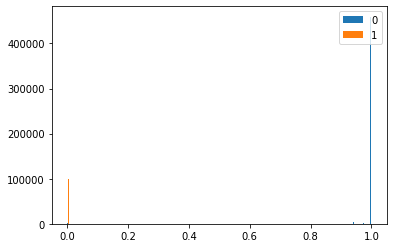

In [41]:
#ideally, 99.99% of bins should be in class 0 near probability 1.0 and 99.99% of bins should be in class 1 near probability 0.0
plt.hist(predictions[0],bins=500,label='0')
plt.hist(predictions[1],bins=500,label='1')
plt.legend(loc='upper right')
plt.show()